In [28]:
import sklearn
import numpy as np
import pandas as pd

In [8]:
from sklearn import datasets, model_selection

In [3]:
digit = datasets.load_digits()

In [7]:
X = digit['data']
y = digit['target']

In [10]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state=42)

In [68]:
def KNN(train, train_target, test):
    answer = []
    
    for i in range(len(test)):
        min_coef = math.inf
        min_index = 0 
        
        for j in range(len(train)):
            coef_similarity = sum((test[i]-train[j])**2)
            if coef_similarity < min_coef:
                min_coef = coef_similarity
                min_index = j
                
        answer.append(train_target[min_index])
        
    return answer

In [69]:
result = KNN(X_train, y_train, X_test)

In [71]:
result = np.array(result)

In [122]:
print(np.mean(result!=y_test))

0.017777777777777778


In [74]:
from sklearn import neighbors

In [121]:
model = neighbors.KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)
print(np.mean(y_test!=model.predict(X_test)))

0.017777777777777778


In [123]:
n_neigh = np.arange(1,100)
error = []
for i in n_neigh:
    model = neighbors.KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    error.append(np.mean(y_test!=model.predict(X_test)))

In [124]:
from matplotlib import pyplot
%matplotlib inline

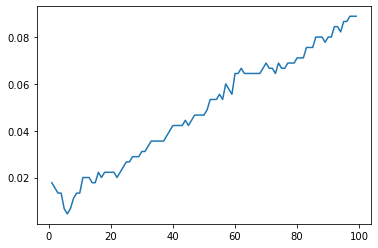

In [125]:
pyplot.plot(n_neigh, error)

In [126]:
pair_error = dict(zip(n_neigh,error))

In [127]:
for key, value in pair_error.items():
    if value == min(pair_error.values()):
        print(key, value)

6 0.0044444444444444444


# Forest

In [128]:
from sklearn import ensemble

In [129]:
forest = ensemble.RandomForestClassifier(n_estimators=1000)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [130]:
print(np.mean(y_test!=forest.predict(X_test)))

0.024444444444444446
